# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [37]:
# Observed Trend 1: There is a clear relationship between lattitude and temperature (temps max at 0 lattitude) with southern hemisphere temps higher during this time of year
# Observed Trend 2: There is no clear relationship between lattitude and humidity, however during this time of year it seems to be more humid in the north, which is possibly related to its winter season
# Observed Trend 3: There is no clear relationship between lattitude and cloudiness, however, its notable cloudiness bands seem to be concentrated at 0, 20, 40, 80, 90,and 100% levels
# Observed Trend 4: There is no clear relationship between lattitude and wind speed, however, wind speeds seem to be higher in more northern hemisphere cities, , which is possibly related to its winter season.
# Observed Trend 5: Even though it cant be stated conclusively, it seems that colder weather is directly related to wind speed and humidity

In [39]:
# Dependencies and Setup                              
import matplotlib.pyplot as plt                       
import numpy as np                                  
import requests                                          
import openweathermapy as ow
import pandas as pd
import time
from datetime import date

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [40]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []


# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

602

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [43]:
data=[]
i=0

print("Beginning Data Retrieval")
print("------------------------")

for city in cities:
    json = requests.get(query_url + city).json()
    i=i+1
    try:
        tempmax=json["main"]['temp_max']
        humidity=json["main"]["humidity"]
        speed=json['wind']["speed"]
        cloudiness=json["clouds"]["all"]
        lat=json["coord"]["lat"]
        country=json['sys']["country"]
        date=json['dt']
        lon=json["coord"]["lon"]
        data.append([city,cloudiness,country,date,humidity,lat,lon,tempmax,speed])
#        data.append([city,temp,temp1,temp2,temp3,temp6,temp4,temp5,temp7])
        print(f"Processing Record {i} | {city}")
        time.sleep(.1)
    except Exception:
        print("City not found. Skipping...")        
print("------------------------")
print("Data Retrieval Complete")
print("------------------------")

Beginning Data Retrieval
------------------------
Processing Record 1 | hermanus
Processing Record 2 | torbay
Processing Record 3 | luderitz
Processing Record 4 | port alfred
Processing Record 5 | manoel urbano
Processing Record 6 | rikitea
Processing Record 7 | hobart
Processing Record 8 | bowen
City not found. Skipping...
City not found. Skipping...
Processing Record 11 | bida
Processing Record 12 | mataura
Processing Record 13 | tiksi
Processing Record 14 | maningrida
Processing Record 15 | aklavik
Processing Record 16 | santa fe
Processing Record 17 | san patricio
Processing Record 18 | lethem
Processing Record 19 | mar del plata
Processing Record 20 | qaanaaq
Processing Record 21 | calama
Processing Record 22 | narasimharajapura
Processing Record 23 | kapaa
Processing Record 24 | thompson
Processing Record 25 | lulea
Processing Record 26 | tuktoyaktuk
Processing Record 27 | flinders
Processing Record 28 | north bend
Processing Record 29 | atuona
Processing Record 30 | norman wells

Processing Record 251 | kavieng
City not found. Skipping...
Processing Record 253 | iqaluit
Processing Record 254 | ulaangom
Processing Record 255 | jining
Processing Record 256 | metro
Processing Record 257 | zhigansk
Processing Record 258 | port elizabeth
Processing Record 259 | morros
Processing Record 260 | aksu
Processing Record 261 | la ronge
Processing Record 262 | bani walid
Processing Record 263 | zima
City not found. Skipping...
City not found. Skipping...
Processing Record 266 | florianopolis
Processing Record 267 | harper
Processing Record 268 | khash
Processing Record 269 | yuncheng
Processing Record 270 | northam
Processing Record 271 | lorengau
Processing Record 272 | klaksvik
Processing Record 273 | chabahar
Processing Record 274 | atasu
Processing Record 275 | geraldton
Processing Record 276 | turukhansk
Processing Record 277 | maceio
Processing Record 278 | northport
Processing Record 279 | moose factory
Processing Record 280 | marawi
Processing Record 281 | acapulco


City not found. Skipping...
Processing Record 504 | parvatsar
Processing Record 505 | yantal
Processing Record 506 | abbeville
City not found. Skipping...
Processing Record 508 | taunggyi
Processing Record 509 | nelson bay
City not found. Skipping...
Processing Record 511 | aron
Processing Record 512 | ancud
Processing Record 513 | port blair
Processing Record 514 | octeville
Processing Record 515 | saldanha
Processing Record 516 | ormara
Processing Record 517 | riyadh
Processing Record 518 | camapua
Processing Record 519 | puri
Processing Record 520 | vostok
Processing Record 521 | sola
Processing Record 522 | hofn
Processing Record 523 | akaltara
Processing Record 524 | acajutla
Processing Record 525 | kashiwazaki
Processing Record 526 | san quintin
Processing Record 527 | wewak
Processing Record 528 | hobyo
Processing Record 529 | guarapari
Processing Record 530 | tyukhtet
Processing Record 531 | dalvik
Processing Record 532 | villablino
Processing Record 533 | binika
Processing Rec

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [48]:
# Create a Pandas DataFrame with the results                 
cities_data_pd = pd.DataFrame(data, columns=['city','cloudiness','country','date','humidity','lat','lon','maxtemp','windspeed'])
cities_data_pd.to_csv(output_data_file)
cities_data_pd.count()

#summary = ["main.temp", "coord.lat", "coord.lon"]
#data = [response(*summary) for response in weather_response]
#cities_pd = pd.DataFrame(cities)

city          538
cloudiness    538
country       538
date          538
humidity      538
lat           538
lon           538
maxtemp       538
windspeed     538
dtype: int64

In [49]:
# Display the DataFrame
cities_data_pd.head()

,city,cloudiness,country,date,humidity,lat,lon,maxtemp,windspeed
0,hermanus,0,ZA,1575581765,66,-34.42,19.24,72.00,1.99
1,torbay,75,CA,1575581765,86,47.66,-52.73,37.40,18.34
2,luderitz,58,NA,1575581766,72,-26.65,15.16,68.00,3.36
3,port alfred,0,ZA,1575581766,82,-33.59,26.89,64.99,1.01
4,manoel urbano,100,BR,1575581766,85,-8.84,-69.26,79.23,0.92


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

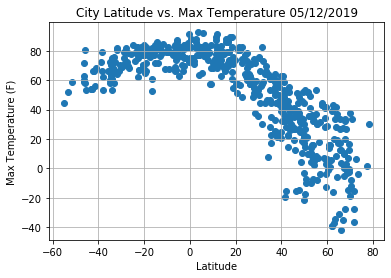

In [50]:
plt.scatter(cities_data_pd["lat"], cities_data_pd["maxtemp"], marker="o")
date=time.strftime("%d/%m/%Y")
plt.title("City Latitude vs. Max Temperature " + date)
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("TemperatureInWorldCities.png")


#### Latitude vs. Humidity Plot

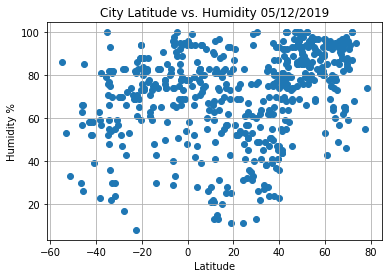

In [51]:
plt.scatter(cities_data_pd["lat"], cities_data_pd["humidity"], marker="o")
plt.title("City Latitude vs. Humidity " + date)
plt.ylabel("Humidity %")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("HumidityInWorldCities.png")

#### Latitude vs. Cloudiness Plot

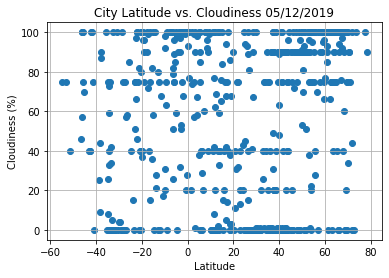

In [52]:
plt.scatter(cities_data_pd["lat"], cities_data_pd["cloudiness"], marker="o")
plt.title("City Latitude vs. Cloudiness " + date)
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("CloudinessInWorldCities.png")

#### Latitude vs. Wind Speed Plot

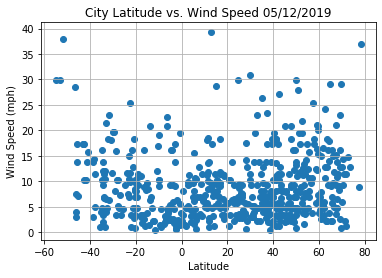

In [53]:
plt.scatter(cities_data_pd["lat"], cities_data_pd["windspeed"], marker="o")
plt.title("City Latitude vs. Wind Speed "  + date)
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("WindSpeedInWorldCities.png")